## TP 1
### Objetivo
El objetivo del primer TP es realizar un análisis exploratorio del set de datos del TP. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Los requisitos de la primera entrega son los siguientes:

 - El análisis debe estar hecho en Python Pandas o R.
 - El análisis debe entregarse en formato papel en una carpeta en donde se incluya el reporte completo y todas las visualizaciones generadas. Es altamente recomendable que las visualizaciones se impriman en color.
 - Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.
 - Agregar en Kaggle un kernel con el análisis exploratorio realizado.
 
### Evaluación

 - Originalidad del análisis exploratorio. 
 - Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 
 - Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 
 #### Calidad de las visualizaciones presentadas.
 - ¿Tienen todos los ejes su rótulo?
 - ¿Tiene cada visualización un título?
 - ¿Es entendible la visualización sin tener que leer la explicación?
 - ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
 - ¿Es una visualización interesante?
 - ¿El uso del color es adecuado?
 - ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
 - ¿La visualización es consistente con los datos?
#### Conclusiones presentadas.
 - ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante?
 - ¿Pudieron descubrir features en el campo ‘model’? ¿Cuales fueron?
 - ¿Identificaron patrones o funnels de usuarios que realizan checkouts/conversiones en Trocafone? 
 - ¿Se comportan de forma distinta dependiendo del tipo de dispositivo desde el cual acceden?
 - ¿Se comportan de forma distinta dependiendo del tipo de fuente de tráfico al que pertenecen?
 - ¿Realizaron algún análisis sobre búsquedas que realizan los usuarios y las keywords que utilizan apoyándose en algún tipo de visualización?
 - ¿Realizaron algún análisis de lugar donde se originan las visitas de los usuarios de Trocafone (a nivel país, regiones más importantes o ciudades más importantes) apoyándose en algún tipo de visualización?
 - ¿Pudieron descubrir features jerarquizando información de alguno de los campos (por ejemplo “screen_resolution”)?
 - ¿El análisis realiza un aporte a Trocafone?




In [1]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(15.7,10.27)})

In [2]:
#Cargo los datos en memoria
eventos = pd.read_csv('fiuba-trocafone-tp1-final-set/events.csv', low_memory=False)


In [3]:
eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Hay algun dato nulo?
eventos.isnull().any()

timestamp                   False
event                       False
person                      False
url                          True
sku                          True
model                        True
condition                    True
storage                      True
color                        True
skus                         True
search_term                  True
staticpage                   True
campaign_source              True
search_engine                True
channel                      True
new_vs_returning             True
city                         True
region                       True
country                      True
device_type                  True
screen_resolution            True
operating_system_version     True
browser_version              True
dtype: bool

In [5]:
#hay alguna columna completamente nula?
eventos.isnull().all()

timestamp                   False
event                       False
person                      False
url                         False
sku                         False
model                       False
condition                   False
storage                     False
color                       False
skus                        False
search_term                 False
staticpage                  False
campaign_source             False
search_engine               False
channel                     False
new_vs_returning            False
city                        False
region                      False
country                     False
device_type                 False
screen_resolution           False
operating_system_version    False
browser_version             False
dtype: bool

In [6]:
#Vamos a analizar algunas características de las columnas
eventos.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [7]:
#Existen 27624 usuarios únicos

cantidadDeUsuarios = eventos['person'].value_counts().count()
print('Cantidad de usuarios total: ', cantidadDeUsuarios)

Cantidad de usuarios total:  27624


In [8]:
#Existen 11 tipos de eventos distintos
eventos['event'].value_counts().count()

11

In [9]:
eventos['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [10]:
#De los 33.735 de checkout, queremos saber si todos los usuarios únicos (27.624) hicieron al menos un checkout.

eventosCheckout = eventos.loc[eventos['event'] == 'checkout','person']
cantidadDeCheckout = eventosCheckout.count()
cantidadDeUsuariosCheckout = eventosCheckout.value_counts().count()
print(cantidadDeUsuariosCheckout,' realizaron al menos un checkout, de un total de ',cantidadDeUsuarios,' usuarios')

27624  realizaron al menos un checkout, de un total de  27624  usuarios


In [11]:
#Viendo que todos hicieron checkout al menos una vez, vemos cuántos realizaron la compra. 
#Puede inferirse que los datos suministrados fueron de usuarios que al menos hicieron un checkout
conversiones = eventos.loc[eventos['event'] == 'conversion','person']
cantidadDeConversiones = conversiones.count()
cantidadDePersonasQueConvierten = conversiones.value_counts().count()
print('Se realizaron',cantidadDeConversiones,'conversiones entre',cantidadDePersonasQueConvierten,'clientes')

Se realizaron 1172 conversiones entre 716 clientes


In [13]:
#De los 27.624 usuarios, 716 hicieron compras
print('De',cantidadDeCheckout,'checkouts se realizaron',cantidadDeConversiones,'conversiones')
print('La tasa de conversion por checkout es de',(cantidadDeConversiones * 100 / cantidadDeCheckout),'%')
print('El porcentaje de usuarios que concreta una compra es de',\
      (cantidadDePersonasQueConvierten * 100 / cantidadDeUsuariosCheckout),'%')

De 33735 checkouts se realizaron 1172 conversiones
La tasa de conversion por checkout es de 3.47413665333 %
El porcentaje de usuarios que concreta una compra es de 2.59194902983 %


#### ¿Cuáles son los modelos que no estaban en stock y los clientes pidieron recibir notificación de disponibilidad?
#### ¿Cuántos clientes se registraron para recibir notificaciones?
#### ¿De cuantos modelos pidieron recibir notificaciones los que más lo solicitaron?

In [14]:
notificacionesDeStock = eventos.loc[eventos['event'] == 'lead',['person','model']]
cantPersonasQueSeRegistraron = notificacionesDeStock['person'].value_counts().count()
print('Se registraron para recibir notificaciones',cantPersonasQueSeRegistraron,'personas')

Se registraron para recibir notificaciones 291 personas


In [15]:
#¿La gente se anotaba para recibir notificaciones de muchos modelos?
notificacionesDeStock['person'].value_counts().head(10)

97e0bcf2    16
52a4edd3    11
58692743     8
8dd8c1b4     6
f21b8696     5
d5661793     5
aaf00dd9     5
d3e5d92b     4
ef4778b7     4
1ac00500     4
Name: person, dtype: int64

In [16]:
#Modelos más requeridos que no estaban en stock
notificacionesDeStock['model'].value_counts().head(10)

iPhone 6 Plus                 35
iPhone 6S Plus                31
Samsung Galaxy J7 Prime       26
iPhone 6S                     21
Motorola Moto G4 Plus         20
iPhone 8                      20
Samsung Galaxy On 7           15
Samsung Galaxy A9 Pro 2016    15
Motorola Moto G5 Plus         15
iPhone 6                      12
Name: model, dtype: int64

#### ¿Cuáles fueron las búsquedas más frecuentes en el buscador?

In [17]:
eventos['search_term'].value_counts().head(15)

Iphone       1207
Iphone 6     1057
iPhone 6     1005
iphone 6      932
iphone        882
iphone 6s     784
Iphone 6s     736
iPhone 6s     716
Motorola      679
iPhone        638
J7            580
J5            540
Samsung       513
S7            474
iphone 7      428
Name: search_term, dtype: int64

In [21]:
#Tratando de depurar un poco lás búsquedas
#eliminando diferencias por mayúsculas y minúsculas
eventos['search_term'] = eventos['search_term'].str.lower()
eventos['search_term'].value_counts().head(20)

iphone 6          3347
iphone            2968
iphone 6s         2576
iphone 7          1354
iphone 5s         1101
j7                 950
motorola           852
j5                 850
s7                 763
iphone 6 plus      756
s8                 700
iphone se          661
samsung            595
iphone 6s plus     592
iphone 5           577
iphone 7 plus      528
s6                 480
j7 prime           436
moto g5            415
lg                 367
Name: search_term, dtype: int64

In [45]:
#Se ve que lo que más se busca es iPhones. Del total de búsquedas, vamos a ver cuántas son de iPhones
totalDeBusquedas = eventos['search_term'].count()
busquedaIncluyeIphone = eventos['search_term'].str.contains('iphone').value_counts().to_frame('cantidad')
busquedaIncluyeIphone.rename({0:'falso',1:'verdadero'},inplace=True)
cantBusquedasIPhone = busquedaIncluyeIphone.loc['verdadero','cantidad']
print('Cantidad de busquedas total:',totalDeBusquedas)
print('Cantidad de búsquedas de iPhones:',cantBusquedasIPhone)
eventos['search_term'].str.lower().str.contains('iphone').value_counts(normalize=True)

Cantidad de busquedas total: 48967
Cantidad de búsquedas de iPhones: 18508


False    0.622031
True     0.377969
Name: search_term, dtype: float64

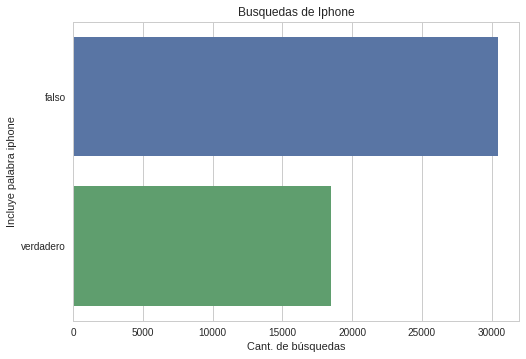

In [47]:
sns.set(style="whitegrid")
plotBusquedaIphone = sns.barplot(x=busquedaIncluyeIphone['cantidad'],y=busquedaIncluyeIphone.index,orient='horizontal')
plotBusquedaIphone.set(title="Busquedas de Iphone",xlabel="Cant. de búsquedas",ylabel="Incluye palabra iphone")

In [48]:
#De las búsquedas que no son iPhone veamos cuales son las más frecuentes:
eventos.loc[eventos['search_term'].str.contains('iphone') == False, 'search_term'].value_counts().head(20)

j7           950
motorola     852
j5           850
s7           763
s8           700
samsung      595
s6           480
j7 prime     436
moto g5      415
lg           367
moto g       353
moto g4      328
s7 edge      327
a5           323
moto z       313
j2           301
6s           279
s5           276
galaxy s7    258
j7 pro       254
Name: search_term, dtype: int64

In [59]:
#Separo marcas y modelos, que puede llegar a ser útil
#eventos[['marca','modelo']] = eventos['model'].dropna().str.lower().str.split(' ',n=1,expand=True)
eventos[['marca','modelo']] = eventos['model'].dropna().str.split(' ',n=1,expand=True)

In [60]:
eventos.loc[:,['marca','modelo']].dropna().drop_duplicates().head(10)

,marca,modelo
2,iPhone,5s
4,Samsung,Galaxy S8
13,Motorola,Moto Z Play
22,iPhone,7 Plus
26,iPhone,6S
48,iPhone,4G
65,iPhone,4S
84,Samsung,Galaxy J5
89,iPhone,5c
104,iPhone,7
